In [5]:
import h5py
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pickle
import pandas as pd

In [6]:
matFilename = './2017-05-12_batchdata_updated_struct_errorcorrect.mat'
f = h5py.File(matFilename)

In [7]:
list(f.keys())

['#refs#', '#subsystem#', 'batch', 'batch_date']

In [8]:
batch = f['batch']

In [9]:
keys = list(batch.keys())
keys

['Vdlin',
 'barcode',
 'channel_id',
 'cycle_life',
 'cycles',
 'policy',
 'policy_readable',
 'summary']

In [10]:
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    print("Step {}/{}".format(i+1,num_cells))
    cl = f[batch['cycle_life'][i,0]].value
    policy = f[batch['policy_readable'][i,0]].value.tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]].value))
        Qc = np.hstack((f[cycles['Qc'][j,0]].value))
        Qd = np.hstack((f[cycles['Qd'][j,0]].value))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]].value))
        T = np.hstack((f[cycles['T'][j,0]].value))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]].value))
        V = np.hstack((f[cycles['V'][j,0]].value))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]].value))
        t = np.hstack((f[cycles['t'][j,0]].value))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b1c' + str(i)
    bat_dict[key]=   cell_dict

Step 1/46
Step 2/46
Step 3/46
Step 4/46
Step 5/46
Step 6/46
Step 7/46
Step 8/46
Step 9/46
Step 10/46
Step 11/46
Step 12/46
Step 13/46
Step 14/46
Step 15/46
Step 16/46
Step 17/46
Step 18/46
Step 19/46
Step 20/46
Step 21/46
Step 22/46
Step 23/46
Step 24/46
Step 25/46
Step 26/46
Step 27/46
Step 28/46
Step 29/46
Step 30/46
Step 31/46
Step 32/46
Step 33/46
Step 34/46
Step 35/46
Step 36/46
Step 37/46
Step 38/46
Step 39/46
Step 40/46
Step 41/46
Step 42/46
Step 43/46
Step 44/46
Step 45/46
Step 46/46


In [ ]:
bat_dict.keys()

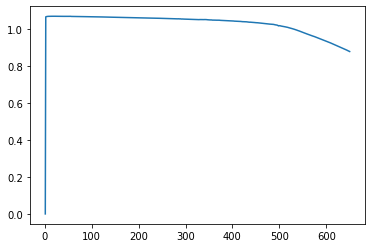

In [14]:
plt.plot(bat_dict['b1c43']['summary']['cycle'], bat_dict['b1c43']['summary']['QD'])

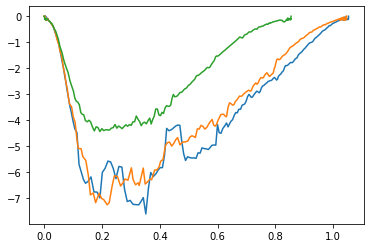

In [27]:
for cycle in ['10','100','600']:
    plt.plot(bat_dict['b1c43']['cycles'][cycle]['Qdlin'], bat_dict['b1c43']['cycles'][cycle]['dQdV'])

In [13]:
with open('batch1.pkl','wb') as fp:
        pickle.dump(bat_dict,fp)